# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:

**Note: if you are using the Udacity workspace, you *DO NOT* need to re-download these - they can be found in the `/data` folder as noted in the cell below.**

* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dog_images`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [73]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/data/lfw/*/*"))
dog_files = np.array(glob("/data/dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


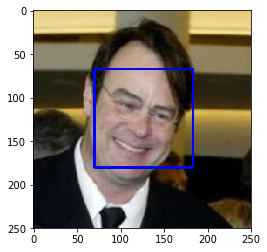

In [74]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [75]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [76]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_files_face_cnt = 0
for i in range(len(human_files_short)):
    if (face_detector(human_files_short[i])) == True:
        human_files_face_cnt += 1
    else:
        human_files_face_cnt += 0
print('There are {0:.1%} human faces detected in human_files.'.format(human_files_face_cnt/len(human_files_short)))


dog_files_face_cnt = 0
for i in range(len(dog_files_short)):
    if (face_detector(dog_files_short[i])) == True:
        dog_files_face_cnt += 1
    else:
        dog_files_face_cnt += 0
print('There are {0:.1%} human faces detected in dog_files.'.format(dog_files_face_cnt/len(dog_files_short)))

There are 98.0% human faces detected in human_files.
There are 17.0% human faces detected in dog_files.


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [313]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [78]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [79]:
from PIL import Image
import torchvision.transforms as transforms
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
def load_image(img_path):    
    image = Image.open(img_path).convert('RGB')
    # resize to (244, 244) because VGG16 accept this shape
    in_transform = transforms.Compose([transforms.Resize(size=(244, 244)),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
    
    # TORCH.UNSQUEEZE returns a new tensor with a dimension of size one inserted at the specified position
    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    return image

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''    

    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    img = load_image(img_path)
    if use_cuda:
        img = img.cuda()
    ret = VGG16(img)
    return torch.max(ret,1)[1].item()
   # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [80]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    idx = VGG16_predict(img_path)
    return idx >= 151 and idx <= 268 # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 


In [81]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_files_dog_cnt = 0
for i in range(len(human_files_short)):
    if (dog_detector(human_files_short[i])) == True:
        human_files_dog_cnt += 1
    else:
        human_files_dog_cnt += 0
print('There are {0:.1%} dog images detected in human_files.'.format(human_files_dog_cnt/len(human_files_short)))


dog_files_dog_cnt = 0
for i in range(len(dog_files_short)):
    if (dog_detector(dog_files_short[i])) == True:
        dog_files_dog_cnt += 1
    else:
        dog_files_dog_cnt += 0
print('There are {0:.1%} dog images detected in dog_files.'.format(dog_files_dog_cnt/len(dog_files_short)))

There are 0.0% dog images detected in human_files.
There are 100.0% dog images detected in dog_files.


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [318]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dog_images/train`, `dog_images/valid`, and `dog_images/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [83]:
import os
import torch
from torchvision import datasets, transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size = 20

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([#transforms.RandomRotation(10),
                                       #transforms.RandomHorizontalFlip(),
                                       #transforms.Resize(255),
                                       #transforms.CenterCrop(224),
                                       transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

# data directory / datasets
data_dir = '/data/dog_images'
train_data = datasets.ImageFolder(os.path.join(data_dir, 'train/'), transform=train_transforms)
valid_data = datasets.ImageFolder(os.path.join(data_dir, 'valid/'), transform=train_transforms)
test_data = datasets.ImageFolder(os.path.join(data_dir, 'test/'), transform=train_transforms)


test_dir = os.path.join(data_dir, 'test/')
#defining the data loaders
# the data is splittedd between training, testing and validation sets
# data loader
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=0, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=0, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=0, shuffle=True)

loaders_scratch = {'train': train_loader,'valid': valid_loader,'test': test_loader}

# print out some data stats
print('loaders_scratch: ', loaders_scratch)
print('Num training images: ', len(train_data))
print('Num valid images: ', len(valid_data))
print('Num test images: ', len(test_data))
print('\n')
print('Train transform: \n ', train_transforms)
print('Valid/Test transform: \n ', test_transforms)

loaders_scratch:  {'train': <torch.utils.data.dataloader.DataLoader object at 0x7f68310dff28>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7f68310dfef0>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x7f68310dff98>}
Num training images:  6680
Num valid images:  835
Num test images:  836


Train transform: 
  Compose(
    RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)
Valid/Test transform: 
  Compose(
    Resize(size=255, interpolation=PIL.Image.BILINEAR)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)


In [109]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([20, 3, 224, 224])
torch.Size([20])


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
-  A common strategy for training neural network is to apply randomness in the input data itself. In my transform logic above, I am randomly rotating and rescaling/cropping the images during training. Hoping this will help my network to generalise as it's seeing the same images in different locations, different sizes or different orientations.
    - Resize(255)
    - CenterCrop(224)
    - Normalize RGB using mean and std dev
    
-  As a result of bullet point 1 above, I have applied transformation augmentation in my dataset. You noticed these images have three color channels and at a higher resolution which means we might need to flattening the image and reshape them accordingly.

Note: As most of the pretrained models require the input to be 224x224 images, I have applied the standard normalization in the model used. Each color channel was normalised using the followings: 
    - Means are [0.485, 0.456, 0.406] and 
    - Standard deviations are [0.229, 0.224, 0.225]

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [110]:
num_dog_breed = len(train_data.class_to_idx)
print('Total number of dog breed in the train dataset are {}.'.format(num_dog_breed))

Total number of dog breed in the train dataset are 133.


In [111]:
import torch.nn as nn
import torch.nn.functional as F


# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        #self.conv1 = nn.Conv2d(in_channels (3 for an RGB image), out_channels, kernel_size, stride=1, padding=0)
        # the original image is (224,224,3) image tensor
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        # [(W−K+2P)/S]+1
        # [(224-3+2)/2]+1 = 112.5
        # this applies (112,112,16)
        
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        # [(W−K+2P)/S]+1
        # [(112-3+2)/2]+1 = 56.5
        # this applies (56,56,32)
        
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # [(W−K+2P)/S]+1
        # [(56-3+2)/1]+1 = 28.5
        # this applies (28,28,64)
        
        # max pool layer
        self.pool = nn.MaxPool2d(2, 2)
        
        # fully-connected layers
        self.fc1 = nn.Linear(50176, 1024)
        self.fc2 = nn.Linear(1024, 512) 
        self.fc3 = nn.Linear(512, 133)        
        
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.25)  
        
        # batch normalisation
        self.batch_norm1 = nn.BatchNorm1d(num_features=1024)
        #self.batch_norm2 = nn.BatchNorm1d(num_features=512)
        
    def forward(self, x):
        ## Define forward behavior
        #x = x.view(x.shape[0], -1)
        # add hidden layer, with relu activation function
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        
        # flatten to vector shape
        x = x.view(-1, 28*28*64)

        # add dropout layer
        x = self.dropout(x)     
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.batch_norm1(self.fc1(x)))
        #x = F.relu(self.fc1(x))
        
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        #x = F.relu(self.batch_norm2(self.fc2(x)))
        x = F.relu(self.fc2(x))
        
        # add dropout layer
        x = self.dropout(x)
        x = self.fc3(x)
        
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
- #1. Firstly, examine the shape of the image, which has 3 RGB colors and its a 224X224 pixel image.
       - torch.Size([32, 3, 224, 224]). Note 32 is batch size.
       
- #2. Then start by applying convolutional layers, max pooling, dropout, batch normalisation, fully-connected layers and lastly defining the feedforward behaviour. 
       - Conv2D:: self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding).
           - We can use the spatial dimension formula to keep changing XY through the layers: [(W−K+2P)/S]+1
       - MaxPool2D:: nn.MaxPool2d(kernel_size, stride, padding, dilation, ceil_mode)
           - This is to down-sample any XY size by the stipulated values.
       - Dropout:: nn.Dropout(0.%)  where % denotes the probability dropout to prevent overfitting.
       - Batch Normalisation:: nn.BatchNorm1d(num_features)
           - Batch Normalization allows us to use much higher learning rates and be less careful about initialization. 
           - It also acts as a regularizer, in some cases eliminating the need for Dropout.
       - Fully-Connected Layers: nn.Linear(in-channel, out-channel)
       - Forward:: self.pool(F.relu(self.conv1(x))).

- For simplicity, am using the following
        - kernel size of (3,3) and padding 1
        - nn.MaxPool2d(2, 2)
        - nn.Dropout(0.25)  

The detailed logical steps on #2 are:-
        - 3 Convolutional Layers
            - Converts image tensor (224,224,3) -- self.conv1 = nn.Conv2d(3,32,kernel,stride,padding) -- nn.MaxPool2d(2, 2)
                ==> (112,112,16)
            - Converts second level via -- self.conv1 = nn.Conv2d(32,64,kernel,stride,padding) -- nn.MaxPool2d(2, 2)
                ==> (56,56,32)
            - Converst third level via -- self.conv2 = nn.Conv2d(64,128,kernel,stride,padding) -- nn.MaxPool2d(2, 2)
                ==> (28,28,64)

        - 3 Fully-connected Layers
            - First layer will responsible for taking as input of my final downside stack of feature maps above.
            - nn.Linear(224*224, 1024) 
            - Second layer takes in the output from the first layer
            - nn.Linear(1024, 512) 
            - Third layer takes in the output from second layer and produce the final output of 133 breed types.
            - nn.Linear(512, 133) -- Note, 133 represents the total number of dog breed in the train dataset.
            
        - Feedfoward behaviour
            - This takes in a sequence of function actions.
                - First it takes the output from each Convolutional layer, then apply ReLu activation function
                - Then apply max pooling layer(s), flatten the image and add dropout to prevent overfitting.
                - Last use the batch normalization function
                
                - self.pool(F.relu(self.conv1(x))) -- repeat this for each convolutional layer.
                - x.view(-1, x.size(0)) then take the end resultant from the convolutional layers and flattens into a vector 
                shape.
                - self.dropout(x) - adding a dropout layers to prevent overfitting
                - self.batch_norm1 - mainly to make model faster and more stable by re-centering and re-scaling

The final CNN model should look like the expression below:-

In [112]:
print(model_scratch)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=133, bias=True)
  (dropout): Dropout(p=0.25)
  (batch_norm1): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [113]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001)
#scheduler = optim.lr_scheduler.StepLR(optimizer_scratch, step_size=50, gamma=0.5)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [89]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# number of epochs to train the model
n_epochs = 100
#Note: The actual n_epochs in my scratch model was supposed to be 100, I broken it down to
#cross validation if the loss between train and validation is diverging as it indicates over/under fitting.


def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate batch loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            ## record the average training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            ## update the average validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))     

        
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased      
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), save_path)
        valid_loss_min = valid_loss
        
    # return trained model
    return model

# train the model
model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch,
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.889406 	Validation Loss: 4.876011
Validation loss decreased (inf --> 4.876011).  Saving model ...


###### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [21]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.925461


Test Accuracy: 11% (92/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [114]:
## TODO: Specify data loaders
import os
from torchvision import datasets, transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
batch_size = 20
num_workers = 0

# TODO: Define transforms for the training data and testing data
train_transforms = transforms.Compose([transforms.Resize(255),
                                       transforms.CenterCrop(224),
                                       transforms.RandomResizedCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])])

# data directory / datasets
data_dir = '/data/dog_images'
train_data = datasets.ImageFolder(data_dir + '/train', transform=train_transforms)
valid_data = datasets.ImageFolder(data_dir + '/valid', transform=valid_transforms)
test_data = datasets.ImageFolder(data_dir + '/test', transform=test_transforms)

#defining the data loaders
# the data is splittedd between training, testing and validation sets
# data loader
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, num_workers=num_workers, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, num_workers=num_workers, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers, shuffle = True)

loaders_transfer = {'train': train_loader,'valid': valid_loader,'test': test_loader}
loaders_transfer
# print out some data stats
print('loaders_transfer: ', loaders_transfer)
print('Num training images: ', len(train_data))
print('Num valid images: ', len(valid_data))
print('Num test images: ', len(test_data))

loaders_transfer:  {'train': <torch.utils.data.dataloader.DataLoader object at 0x7f6839924be0>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7f68399247b8>, 'test': <torch.utils.data.dataloader.DataLoader object at 0x7f6839924390>}
Num training images:  6680
Num valid images:  835
Num test images:  836


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [115]:
model_transfer=models.resnet50(pretrained=True)
print(model_transfer)
print(model_transfer.fc.in_features) 
print(model_transfer.fc.out_features) 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=F

Note: 
- __VGG__ has three FC layers, two with 4096 neurons and one with 1000 neurons which outputs the class probabilities.
- __ResNet__ only has one FC layer with 1000 neurons which again outputs the class probabilities.

In both models, we need to add a last linear layer to change the output to 133 dog breed.

In [116]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer=models.resnet50(pretrained=True)

# Freeze training for all "features" layers
for param in model_transfer.parameters():
    param.requires_grad = False

# add last linear layer (n_inputs -> 133 dog breed)
# new layers automatically have requires_grad = True
num_features = model_transfer.fc.in_features
model_transfer.fc = nn.Linear(num_features, 133, bias=True)

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ This layer should see as input the number of features produced by the portion of the network that you are not changing, and produce an appropriate number of outputs for the dog breed classification task.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [117]:
import torch.nn as nn
import torch.optim as optim

criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [118]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
# number of epochs to train the model
n_epochs = 30

# train the model
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
                
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model_transfer(data)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
                                  
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            # forward pass: compute predicted outputs by passing inputs to the model
            output = model_transfer(data)
            # calculate the loss
            loss = criterion(output, target)
            ## update the average validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))     

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased      
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), save_path)
        valid_loss_min = valid_loss
        
    # return trained model
    return model

# train the model
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, 
                       criterion_transfer, use_cuda, 'model_transfer.pt')

# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.846530 	Validation Loss: 4.691017
Epoch: 2 	Training Loss: 4.659173 	Validation Loss: 4.467757
Epoch: 3 	Training Loss: 4.492014 	Validation Loss: 4.263167
Epoch: 4 	Training Loss: 4.333506 	Validation Loss: 4.071611
Epoch: 5 	Training Loss: 4.187287 	Validation Loss: 3.864922
Epoch: 6 	Training Loss: 4.040611 	Validation Loss: 3.667359
Epoch: 7 	Training Loss: 3.902978 	Validation Loss: 3.496044
Epoch: 8 	Training Loss: 3.776848 	Validation Loss: 3.305562
Epoch: 9 	Training Loss: 3.659375 	Validation Loss: 3.196851
Epoch: 10 	Training Loss: 3.524764 	Validation Loss: 3.028365
Epoch: 11 	Training Loss: 3.426576 	Validation Loss: 2.897771
Epoch: 12 	Training Loss: 3.318789 	Validation Loss: 2.767684
Epoch: 13 	Training Loss: 3.231010 	Validation Loss: 2.642348
Epoch: 14 	Training Loss: 3.138403 	Validation Loss: 2.516858
Epoch: 15 	Training Loss: 3.050764 	Validation Loss: 2.432955
Epoch: 16 	Training Loss: 2.952610 	Validation Loss: 2.310414
Epoch: 17 	Traini

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [119]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.391905


Test Accuracy: 76% (641/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [120]:
from PIL import ImageFile
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
data_transfer = loaders_transfer.copy()
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].dataset.classes]

def load_image(img_path):    
    image = Image.open(img_path).convert('RGB')
    # resize to (244, 244) 
    in_transform = transforms.Compose([transforms.Resize(size=(224, 224)),
                                       transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
    # discard the transparent, alpha channel (that's the :3) and add the batch dimension
    image = in_transform(image)[:3,:,:].unsqueeze(0)
    return image

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    img = load_image(img_path)
    
    if use_cuda:
        img = img.cuda()
    model_transfer.eval()
    prediction = model_transfer(img)
    
    if torch.cuda.is_available():
        prediction = prediction.cpu()
        
    prediction = prediction.data.numpy().argmax()
    predict_breed = class_names[prediction]
    
    return predict_breed

#test the function
print(predict_breed_transfer('/data/dog_images/train/001.Affenpinscher/Affenpinscher_00001.jpg'))
print(predict_breed_transfer('/data/dog_images/train/103.Mastiff/Mastiff_06833.jpg'))

Affenpinscher
Bullmastiff


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [121]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
import cv2

def display_image(img_path, title="Title"):
    image = Image.open(img_path)
    plt.title(title)
    plt.imshow(image)
    plt.show()
    
def run_app(img_path):
    if dog_detector(img_path) == True:
        predicted_breed = predict_breed_transfer(img_path)
        display_image(img_path, title=predicted_breed)
        
    elif face_detector(img_path):
        print('hello, human!')
        display_image(img_path, title='')
        predicted_breed = predict_breed_transfer(img_path)       
        print('You look like a ...')
        print(predicted_breed)
            
    else:
        print("Error!")
        display_image(img_path, title="Image is not human or dog.")
    print("\n")

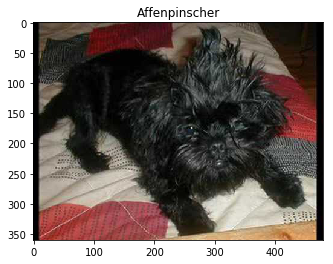



hello, human!


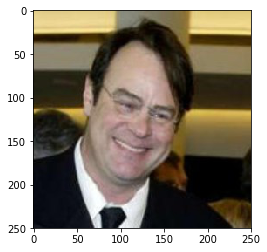

You look like a ...
Basenji




In [122]:
run_app('/data/dog_images/train/001.Affenpinscher/Affenpinscher_00002.jpg')
run_app('/data/lfw/Dan_Ackroyd/Dan_Ackroyd_0001.jpg')

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ The output (below) was reasonably better than expected. 

- From the 10 images from my computer, they are considerably well except 1 cat image which was wrongly predicted. I did that deliberately as the image really looks like a puppy rather than a cat. I wanted to make some solid challenges to my algorithm.

- From the human files / dog files given in this assignment, they are predicted accurately.
After all, my model accuracy is only 72% which means there are still rooms for improvment.

Some of the possible points which can further improve on my algorithm are:
- Increase more dog images in train dataset
- Apply Image Augmentation (randomflip, horizontalflip, resize, centercrop etc)
- Tweak batch size
- Increase Dense layers
- Tweak dropout rate
- Tweak max pooling layer
- Use average pooling layer
- Use batch normalization
- Tweak learning rate
- Use optim.Adam vs optim.SGD
- Increase no of epochs

Alternatively, we can try using other algorithms e.g. AlexNet, VGGNet or Inception.

In [123]:
#test if images are loaded in the folder
import os
print('Dog Images path is set to', os.path.exists('./MyTestImage/Dog'))
print('Cat Images path is set to', os.path.exists('./MyTestImage/Cat'))
print('Human Images path is set to', os.path.exists('./MyTestImage/Human'))

Dog Images path is set to True
Cat Images path is set to True
Human Images path is set to True


In [127]:
# load filenames for human, dog and cat images
human = np.array(glob("./MyTestImage/Human/*"))
dog = np.array(glob("./MyTestImage/Dog/*"))
cat = np.array(glob("./MyTestImage/Cat/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human))
print('There are %d total dog images.' % len(dog))
print('There are %d total cat images.' % len(cat))
print('In summary, there are a total of %d external images.' % (len(cat)+len(human)+len(dog)))

There are 7 total human images.
There are 6 total dog images.
There are 2 total cat images.
In summary, there are a total of 15 external images.


In [128]:
# check filename in each folder
for file in np.hstack((human, dog, cat)):
    print(file)

./MyTestImage/Human/Human006.jpg
./MyTestImage/Human/Human002.jpg
./MyTestImage/Human/Human001.jpg
./MyTestImage/Human/Human003.jpg
./MyTestImage/Human/Human004.jpg
./MyTestImage/Human/Human005.jpg
./MyTestImage/Human/Human007.jpg
./MyTestImage/Dog/Dog001.jpg
./MyTestImage/Dog/Dog004.jpg
./MyTestImage/Dog/Dog005.jpg
./MyTestImage/Dog/Dog006.jpg
./MyTestImage/Dog/Dog002.jpg
./MyTestImage/Dog/Dog003.jpg
./MyTestImage/Cat/Cat002.jpg
./MyTestImage/Cat/Cat001.jpg


hello, human!


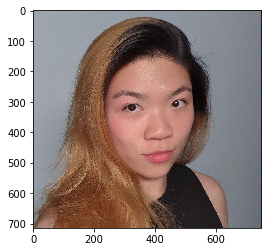

You look like a ...
Havanese


hello, human!


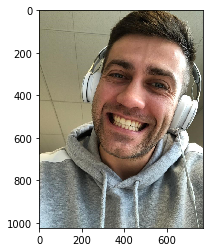

You look like a ...
Bulldog


hello, human!


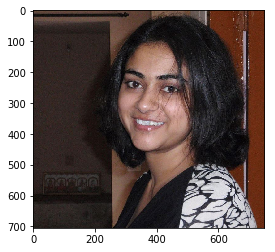

You look like a ...
Poodle


hello, human!


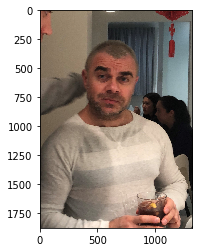

You look like a ...
Italian greyhound


hello, human!


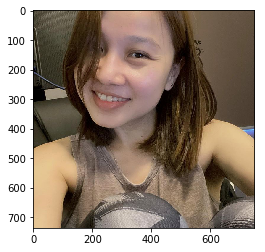

You look like a ...
Bull terrier


hello, human!


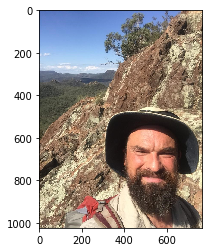

You look like a ...
Greyhound


hello, human!


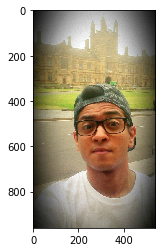

You look like a ...
Bulldog




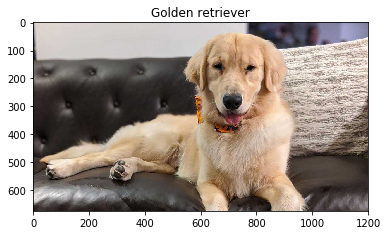

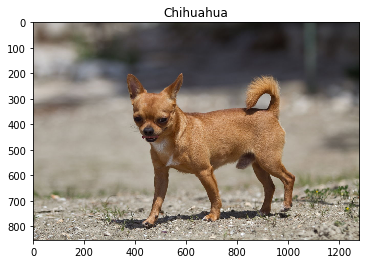

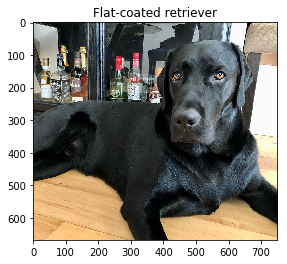

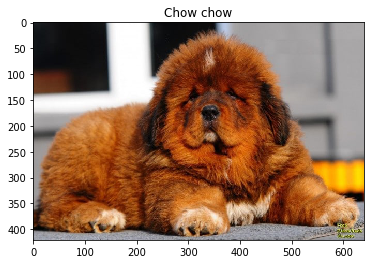

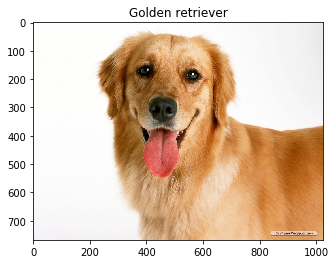

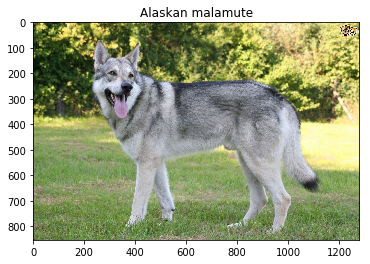

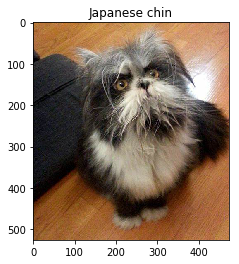



Error!


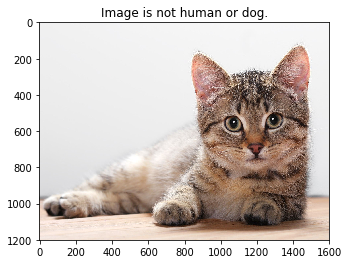

In [129]:
# check filename in each folder
for file in np.hstack((human, dog, cat)):
    run_app(file)

In [134]:
# detect dog breed
#run_app('./MyTestImage/Dog/Dog001.jpg')
#run_app('./MyTestImage/Dog/Dog002.jpg')
#run_app('./MyTestImage/Dog/Dog004.jpg')
#run_app('./MyTestImage/Dog/Dog005.jpg')
#run_app('./MyTestImage/Dog/Dog006.jpg')

In [135]:
for file in np.hstack((human_files[:3], dog_files[:3])):
    print(file)

/data/lfw/Dan_Ackroyd/Dan_Ackroyd_0001.jpg
/data/lfw/Alex_Corretja/Alex_Corretja_0001.jpg
/data/lfw/Daniele_Bergamin/Daniele_Bergamin_0001.jpg
/data/dog_images/train/103.Mastiff/Mastiff_06833.jpg
/data/dog_images/train/103.Mastiff/Mastiff_06826.jpg
/data/dog_images/train/103.Mastiff/Mastiff_06871.jpg


hello, human!


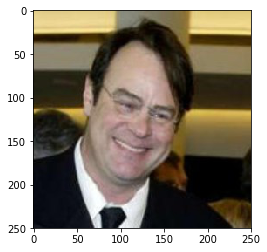

You look like a ...
Basenji


hello, human!


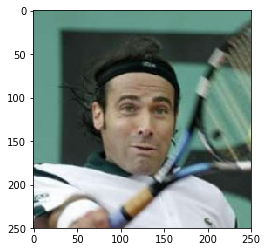

You look like a ...
Basenji


hello, human!


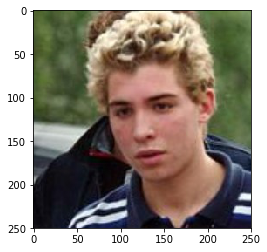

You look like a ...
Cane corso


hello, human!


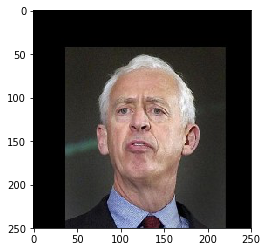

You look like a ...
Bull terrier


hello, human!


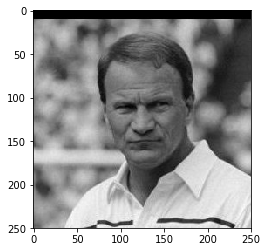

You look like a ...
Basenji


hello, human!


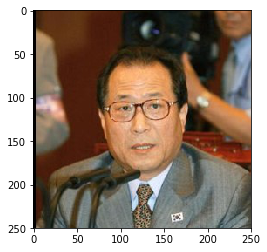

You look like a ...
Basenji


hello, human!


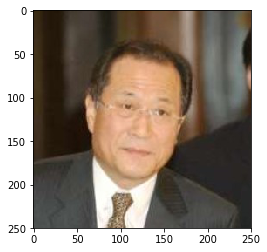

You look like a ...
Basenji


hello, human!


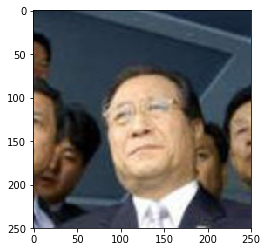

You look like a ...
Bull terrier


hello, human!


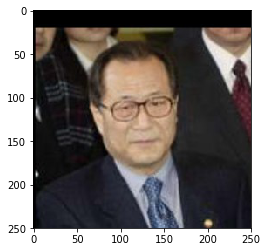

You look like a ...
Basenji


hello, human!


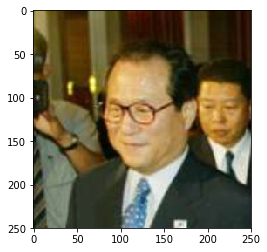

You look like a ...
Basenji




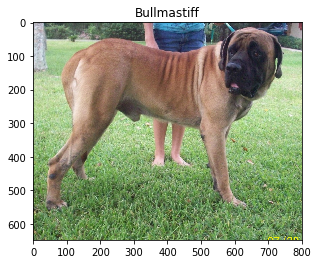

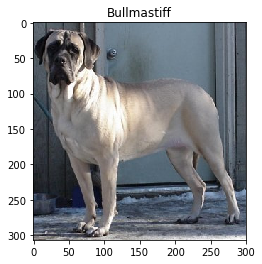

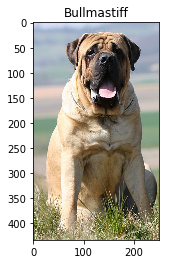

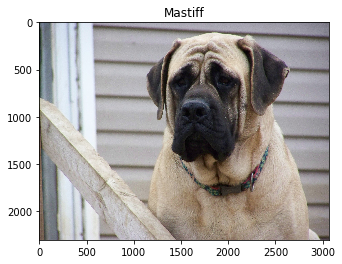

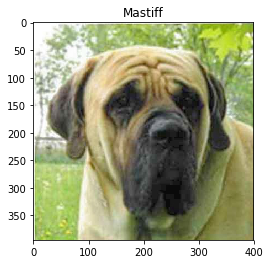

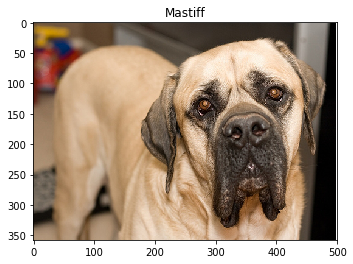

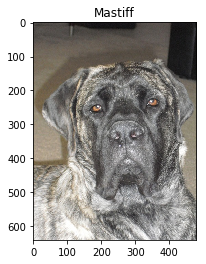

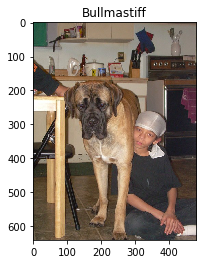

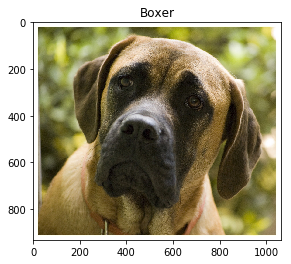

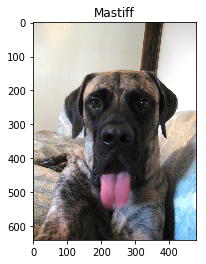

In [136]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:10], dog_files[:10])):
    run_app(file)